# 実践演習2-2

実践演習2-1に主成分分析とデータ可視化を加えます。

## 具体的な手順

* データの読み込み
* 主成分分析
* 標準化・可視化
* 学習（10-fold CVによる評価）
* 結果表示

## 準備

使用するパッケージを読み込みます。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## データの読み込み

irisデータはscikit-learnに組み込みで用意されています。  
http://scikit-learn.org/stable/datasets/index.html  
load_iris()メソッドの戻り値はBunchオブジェクトで、キーdataに特徴ベクトル、キーtargetに正解ラベルが格納されています。

In [2]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 主成分分析

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(iris.data)
X2

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

## 標準化

特徴ベクトルを標準化したものをXに格納します。

In [6]:
X = scale(X2)
X

array([[-1.31027769,  0.665813  ],
       [-1.32549971, -0.34565409],
       [-1.41064601, -0.27998911],
       [-1.34065489, -0.63424977],
       [-1.33194435,  0.68072975],
       [-1.1129166 ,  1.52440999],
       [-1.37699885, -0.16737608],
       [-1.28209956,  0.34738382],
       [-1.40973759, -1.1636137 ],
       [-1.30521934, -0.21749888],
       [-1.22354423,  1.32901741],
       [-1.27558808,  0.04387139],
       [-1.36066719, -0.4642651 ],
       [-1.57435995, -1.02597306],
       [-1.29042788,  2.41814543],
       [-1.16366981,  2.74138051],
       [-1.28016857,  1.66773589],
       [-1.29276097,  0.65058354],
       [-1.07346515,  1.79240366],
       [-1.26299568,  1.06102374],
       [-1.12787054,  0.81108278],
       [-1.24146305,  0.89703705],
       [-1.56979935,  0.28869375],
       [-1.12425674,  0.21511573],
       [-1.1501491 , -0.06362304],
       [-1.22422296, -0.28347656],
       [-1.20525311,  0.28109342],
       [-1.25081394,  0.763822  ],
       [-1.28861104,

各次元の平均・分散を確認します。  

引数axisの値は0が列方向、1が行方向です。省略すると全要素に対する計算になります。

In [7]:
X.mean(axis=0)

array([  4.73695157e-17,   3.55271368e-17])

In [8]:
X.var(axis=0)

array([ 1.,  1.])

正解ラベルをyに格納します。

In [9]:
y = iris.target

## データの可視化

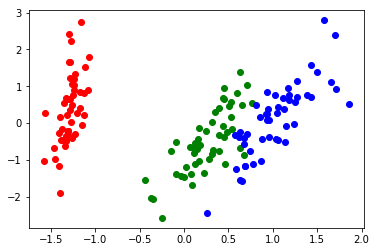

In [10]:
plt.plot(X[:50,0], X[:50,1],"ro")
plt.plot(X[50:100,0], X[50:100,1],"go")
plt.plot(X[100:,0], X[100:,1],"bo")

正解ラベルを使ったコード  

参考）numpyのboolインデックス  
https://docs.scipy.org/doc/numpy-1.12.0/user/basics.indexing.html#boolean-or-mask-index-arrays

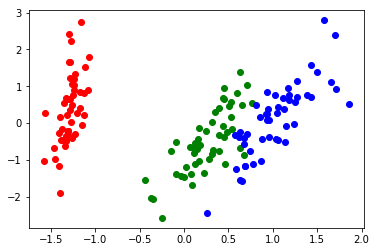

In [11]:
plt.plot(X[y==0,0], X[y==0,1],"ro")
plt.plot(X[y==1,0], X[y==1,1],"go")
plt.plot(X[y==2,0], X[y==2,1],"bo")

## 学習

1-NN法による識別を行うインスタンスを作成します

In [12]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

交差確認法を実行し、結果を格納します。

In [13]:
score = cross_val_score(clf, X, y, cv=10)
score

array([ 1.        ,  0.93333333,  0.86666667,  0.93333333,  0.93333333,
        0.93333333,  0.93333333,  1.        ,  1.        ,  0.86666667])

## 結果の表示

識別率の平均と標準偏差を表示します。

In [14]:
print("{0:4.2f} +/- {1:4.2f} %".format(score.mean() * 100, score.std() * 100))

94.00 +/- 4.67 %
